# A Finite Element Examples: Frame 05

This example is based on the frame04 example distributed with FEM.edu

This is a multi story frame system with three bays on each floor.

## Load needed components

We need to add the local code to the path or python won't find FEM.edu

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join("..")))

Now load the needed components of FEM.edu

In [2]:
from femedu.domain import *
from femedu.solver.NewtonRaphsonSolver import *
from femedu.elements.Frame2D import *
from femedu.materials.ElasticSection import *

## Build a model

In [3]:
# initialize a system model

N  = 8     # number of elements

B = 720.
H = 720.

E  = 29000.0
A = 150.0
I = 250.0

w = 0.10
load_at_nodes_only = False # set to True to apply equivalent nodal forces and moments

Ph = 0.00      # additional horizontal load per floor (imperfections)

# ========== setting global parameters ==============

target_load_level = 20.
max_steps = 10
load_levels = np.linspace(0, target_load_level, max_steps)

# ========= build your structural model =============

model = System()
model.setSolver(NewtonRaphsonSolver())

x0 = 0.0
x1 = B / 3
x2 = 2 * B / 3
x3 = B

y0 = 0.0
y1 = H / 4
y2 = 2 * H / 4
y3 = 3 * H / 4
y4 = H

X10 = Node(x0, y0)
X11 = Node(x0, y1)
X12 = Node(x0, y2)
X13 = Node(x0, y3)
X14 = Node(x0, y4)

X20 = Node(x1, y0)
X21 = Node(x1, y1)
X22 = Node(x1, y2)
X23 = Node(x1, y3)
X24 = Node(x1, y4)

X30 = Node(x2, y0)
X31 = Node(x2, y1)
X32 = Node(x2, y2)
X33 = Node(x2, y3)
X34 = Node(x2, y4)

X40 = Node(x3, y0)
X41 = Node(x3, y1)
X42 = Node(x3, y2)
X43 = Node(x3, y3)
X44 = Node(x3, y4)

model.addNode(X10,X11,X12,X13,X14)
model.addNode(X20,X21,X22,X23,X24)
model.addNode(X30,X31,X32,X33,X34)
model.addNode(X40,X41,X42,X43,X44)

# columns

params = {'E': E, 'A': A, 'I': I}

C11 = Frame2D(X10, X11, ElasticSection(params))
C12 = Frame2D(X11, X12, ElasticSection(params))
C13 = Frame2D(X12, X13, ElasticSection(params))
C14 = Frame2D(X13, X14, ElasticSection(params))

model.addElement(C11,C12,C13,C14)

params = {'E': E, 'A': 2*A, 'I': 1.5*I}

C21 = Frame2D(X20, X21, ElasticSection(params))
C22 = Frame2D(X21, X22, ElasticSection(params))
C23 = Frame2D(X22, X23, ElasticSection(params))
C24 = Frame2D(X23, X24, ElasticSection(params))

model.addElement(C21,C22,C23,C24)

C31 = Frame2D(X30, X31, ElasticSection(params))
C32 = Frame2D(X31, X32, ElasticSection(params))
C33 = Frame2D(X32, X33, ElasticSection(params))
C34 = Frame2D(X33, X34, ElasticSection(params))

model.addElement(C31,C32,C33,C34)

params = {'E': E, 'A': A, 'I': I}

C41 = Frame2D(X40, X41, ElasticSection(params))
C42 = Frame2D(X41, X42, ElasticSection(params))
C43 = Frame2D(X42, X43, ElasticSection(params))
C44 = Frame2D(X43, X44, ElasticSection(params))

model.addElement(C41,C42,C43,C44)

# floors

params = {'E': E, 'A': A, 'I': 3*I}

F11 = Frame2D(X11, X21, ElasticSection(params))
F12 = Frame2D(X21, X31, ElasticSection(params))
F13 = Frame2D(X31, X41, ElasticSection(params))

model.addElement(F11,F12,F13)

F21 = Frame2D(X12, X22, ElasticSection(params))
F22 = Frame2D(X22, X32, ElasticSection(params))
F23 = Frame2D(X32, X42, ElasticSection(params))

model.addElement(F21,F22,F23)

F31 = Frame2D(X13, X23, ElasticSection(params))
F32 = Frame2D(X23, X33, ElasticSection(params))
F33 = Frame2D(X33, X43, ElasticSection(params))

model.addElement(F31,F32,F33)

F41 = Frame2D(X14, X24, ElasticSection(params))
F42 = Frame2D(X24, X34, ElasticSection(params))
F43 = Frame2D(X34, X44, ElasticSection(params))

model.addElement(F41,F42,F43)

# fixities
X10.fixDOF('ux','uy','rz')   # fixed
X20.fixDOF('ux','uy','rz')   # fixed
X30.fixDOF('ux','uy','rz')   # fixed
X40.fixDOF('ux','uy','rz')   # fixed

# reference load
#Pcr = np.pi**2 * EI / L**2
model.resetLoad()            # size load vector and initialize
#model.addLoad(Xn, -Pcr, dof=0) # add a horizontal force (first dof only) ; remember C-style indexing: 0,1,...,(n-1)

if load_at_nodes_only:

    # floor loading as nodal loads ...

    Pe = w * B/3
    Mi = w * (B/3)**2 /12

    X11.addLoad([-Pe/2., -Mi],['uy','rz'])
    X21.addLoad([-Pe/2.,  0.],['uy','rz'])
    X31.addLoad([-Pe/2.,  0.],['uy','rz'])
    X41.addLoad([-Pe/2.,  Mi],['uy','rz'])

    X12.addLoad([-Pe/2., -Mi],['uy','rz'])
    X22.addLoad([-Pe/2.,  0.],['uy','rz'])
    X32.addLoad([-Pe/2.,  0.],['uy','rz'])
    X42.addLoad([-Pe/2.,  Mi],['uy','rz'])

    X13.addLoad([-Pe/2., -Mi],['uy','rz'])
    X23.addLoad([-Pe/2.,  0.],['uy','rz'])
    X33.addLoad([-Pe/2.,  0.],['uy','rz'])
    X43.addLoad([-Pe/2.,  Mi],['uy','rz'])

    X14.addLoad([-Pe/2., -Mi],['uy','rz'])
    X24.addLoad([-Pe/2.,  0.],['uy','rz'])
    X34.addLoad([-Pe/2.,  0.],['uy','rz'])
    X44.addLoad([-Pe/2.,  Mi],['uy','rz'])

else:

    # floor loading as distributed loads ...

    F11.setDistLoad(-w)
    F12.setDistLoad(-w)
    F13.setDistLoad(-w)

    F21.setDistLoad(-w)
    F22.setDistLoad(-w)
    F23.setDistLoad(-w)

    F31.setDistLoad(-w)
    F32.setDistLoad(-w)
    F33.setDistLoad(-w)

    F41.setDistLoad(-w)
    F42.setDistLoad(-w)
    F43.setDistLoad(-w)


# wind load ...

X11.addLoad([Ph],['ux'])   # horizontal load
X12.addLoad([Ph],['ux'])   # horizontal load
X13.addLoad([Ph],['ux'])   # horizontal load
X14.addLoad([Ph/2],['ux']) # horizontal load


# show model information
print(model)


System object
Node0({'ux': 0, 'uy': 1, 'rz': 2}, x=[0. 0.], u=None)
Node1({'ux': 0, 'uy': 1, 'rz': 2}, x=[  0. 180.], u=None)
Node2({'ux': 0, 'uy': 1, 'rz': 2}, x=[  0. 360.], u=None)
Node3({'ux': 0, 'uy': 1, 'rz': 2}, x=[  0. 540.], u=None)
Node4({'ux': 0, 'uy': 1, 'rz': 2}, x=[  0. 720.], u=None)
Node5({'ux': 0, 'uy': 1, 'rz': 2}, x=[240.   0.], u=None)
Node6({'ux': 0, 'uy': 1, 'rz': 2}, x=[240. 180.], u=None)
Node7({'ux': 0, 'uy': 1, 'rz': 2}, x=[240. 360.], u=None)
Node8({'ux': 0, 'uy': 1, 'rz': 2}, x=[240. 540.], u=None)
Node9({'ux': 0, 'uy': 1, 'rz': 2}, x=[240. 720.], u=None)
Node10({'ux': 0, 'uy': 1, 'rz': 2}, x=[480.   0.], u=None)
Node11({'ux': 0, 'uy': 1, 'rz': 2}, x=[480. 180.], u=None)
Node12({'ux': 0, 'uy': 1, 'rz': 2}, x=[480. 360.], u=None)
Node13({'ux': 0, 'uy': 1, 'rz': 2}, x=[480. 540.], u=None)
Node14({'ux': 0, 'uy': 1, 'rz': 2}, x=[480. 720.], u=None)
Node15({'ux': 0, 'uy': 1, 'rz': 2}, x=[720.   0.], u=None)
Node16({'ux': 0, 'uy': 1, 'rz': 2}, x=[720. 180.], u=Non

## Path-Following and Stability Analysis

In [4]:
# initialize the analysis:
model.resetDisplacements()   # set U to all zeros
model.setLoadFactor(0.0)     # define a known equilibrium solution

model.startRecorder()        # not doing anything yet, but will do the data collection soon

detKt   = []
lambdas = []

# solve for all load_levels
for loadfactor in load_levels:

    # define node X2 as the controled node; downward direction is prescribed:
    model.setLoadFactor(loadfactor)
    model.solve(verbose=True)

    # stability check
    lambdas.append(model.loadfactor)
    detKt.append(model.solver.checkStability())

    # report results
    print('+')
    #model.report()

    print("\n=== next load level ===\n")
    

print(lambdas)
print(detKt)


norm of the out-of-balance force:   0.0000e+00
+

 ** Stability check: (smallest eigenvalue of Kt) = 1.4498657938144892

+

=== next load level ===

norm of the out-of-balance force:   3.0217e+03
norm of the out-of-balance force:   9.3991e+00
norm of the out-of-balance force:   1.5330e-03
norm of the out-of-balance force:   3.4141e-07
+

 ** Stability check: (smallest eigenvalue of Kt) = 1.3616847347758743

+

=== next load level ===

norm of the out-of-balance force:   3.0217e+03
norm of the out-of-balance force:   1.9094e+01
norm of the out-of-balance force:   6.1842e-03
norm of the out-of-balance force:   2.7242e-06
norm of the out-of-balance force:   1.1603e-07
+

 ** Stability check: (smallest eigenvalue of Kt) = 1.2727390536406615

+

=== next load level ===

norm of the out-of-balance force:   3.0217e+03
norm of the out-of-balance force:   2.9015e+01
norm of the out-of-balance force:   1.4203e-02
norm of the out-of-balance force:   9.3667e-06
norm of the out-of-balance force:   

In [5]:
#
# ==== check the current state of the model ===
#

model.report()


System Analysis Report

Nodes:
---------------------
  Node 0: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[0. 0.], fix:['ux', 'uy', 'rz'], 
          P:[0. 0. 0.], u:[0. 0. 0.]
  Node 1: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[  0. 180.], fix:[], 
          P:[0. 0. 0.], u:[-0.00119025 -0.03547532 -0.01397541]
  Node 2: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[  0. 360.], fix:[], 
          P:[0. 0. 0.], u:[ 0.00021134 -0.06209611 -0.01190609]
  Node 3: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[  0. 540.], fix:[], 
          P:[0. 0. 0.], u:[-0.00060736 -0.07973241 -0.01101183]
  Node 4: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[  0. 720.], fix:[], 
          P:[0. 0. 0.], u:[ 0.00291642 -0.08834182 -0.01832313]
  Node 5: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[240.   0.], fix:['ux', 'uy', 'rz'], 
          P:[0. 0. 0.], u:[0. 0. 0.]
  Node 6: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[240. 180.], fix:[], 
          P:[0. 0. 0.], u:[-0.00033556 -0.04184855  0.00244719]
  Node 7: {'ux': 0, 

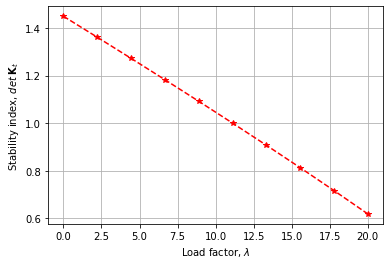

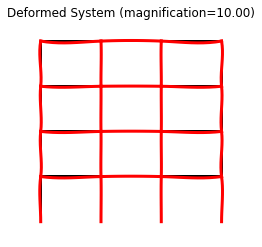

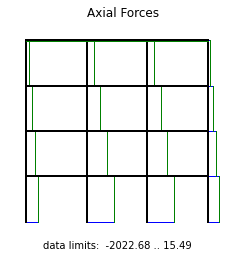

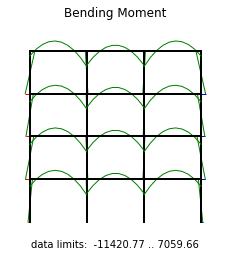

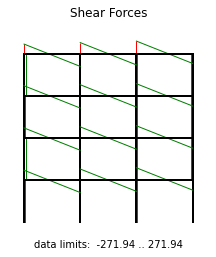

In [6]:
#
# ==== create some nice plots ===
#

plt.plot(lambdas,detKt,'--*r')
plt.grid(True)
plt.xlabel('Load factor, $ \lambda $')
plt.ylabel("Stability index, $ {det}\: {\\bf K}_t $")
plt.show()

model.plot(factor=10.0)

model.beamValuePlot("F")
model.beamValuePlot("M")
model.beamValuePlot("V")


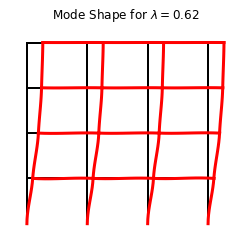

In [7]:
# buckling (mode) shapes can be computed and plotted as well
#
# mode=0 is the closest mode.  This is the default

model.plotBucklingMode(factor=200.)

## Adding more load steps

In [11]:
# solve for all load_levels
newxt_load_levels = np.linspace(load_levels[-1], load_levels[-1]+10.0, 5)

for loadfactor in newxt_load_levels:

    model.setLoadFactor(loadfactor)
    model.solve(verbose=True)

    # stability check
    lambdas.append(model.loadfactor)
    detKt.append(model.solver.checkStability())

    # report results
    print('+')
    #model.report()

    print("\n=== next load level ===\n")

norm of the out-of-balance force:   6.0548e-07
+

 ** Stability check: (smallest eigenvalue of Kt) = 0.6181548241599643

+

=== next load level ===

norm of the out-of-balance force:   3.3994e+03
norm of the out-of-balance force:   1.2281e+02
norm of the out-of-balance force:   2.1460e-01
norm of the out-of-balance force:   5.2835e-04
norm of the out-of-balance force:   1.1472e-06
norm of the out-of-balance force:   2.3657e-08
+

 ** Stability check: (smallest eigenvalue of Kt) = 0.5045154091188202

+

=== next load level ===

norm of the out-of-balance force:   3.3994e+03
norm of the out-of-balance force:   1.3914e+02
norm of the out-of-balance force:   2.7241e-01
norm of the out-of-balance force:   7.5776e-04
norm of the out-of-balance force:   1.8531e-06
norm of the out-of-balance force:   9.7116e-09
+

 ** Stability check: (smallest eigenvalue of Kt) = 0.38671826439897816

+

=== next load level ===

norm of the out-of-balance force:   3.3994e+03
norm of the out-of-balance force:  

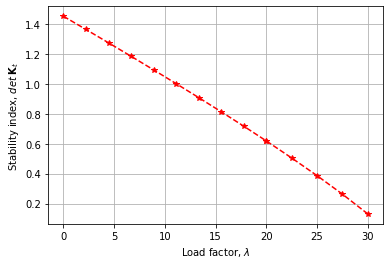

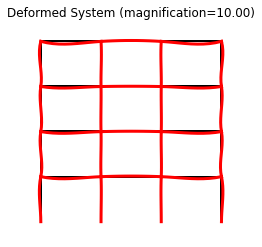

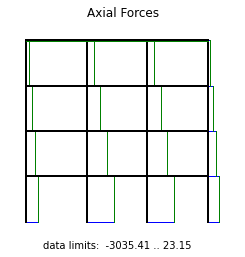

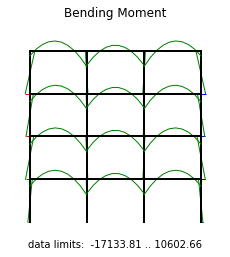

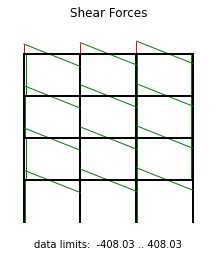

In [12]:
#
# ==== create some nice plots ===
#

plt.plot(lambdas,detKt,'--*r')
plt.grid(True)
plt.xlabel('Load factor, $ \lambda $')
plt.ylabel("Stability index, $ {det}\: {\\bf K}_t $")
plt.show()

model.plot(factor=10.0)

model.beamValuePlot("F")
model.beamValuePlot("M")
model.beamValuePlot("V")


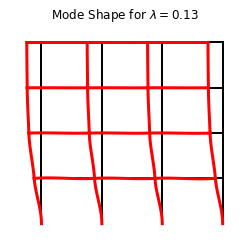

In [13]:
# buckling (mode) shapes can be computed and plotted as well
#
# mode=0 is the closest mode.  This is the default

model.plotBucklingMode(factor=200.)

## Adding just one load step

norm of the out-of-balance force:   2.4391e-08
+

 ** Stability check: (smallest eigenvalue of Kt) = 0.016748315090521947



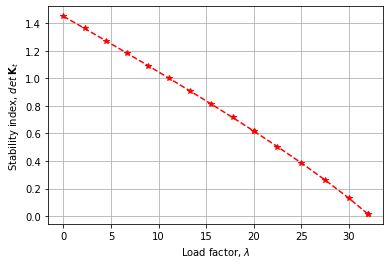

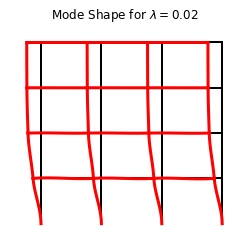

In [15]:
# move to load level 33.

model.setLoadFactor(32.)
model.solve(verbose=True)

# stability check
lambdas.append(model.loadfactor)
detKt.append(model.solver.checkStability())

# buckling (mode) shapes can be computed and plotted as well
#
# mode=0 is the closest mode.  This is the default

plt.plot(lambdas,detKt,'--*r')
plt.grid(True)
plt.xlabel('Load factor, $ \lambda $')
plt.ylabel("Stability index, $ {det}\: {\\bf K}_t $")
plt.show()

model.plotBucklingMode(factor=200.)